# Exploratory Data Analysis using Spotify Songs Dataset

- [x] Top 5 most popular artist
- [x] Top 5 loudest tracks
- [x] Artist with the most danceanility song
- [x] Top 10 Instrumental tracks
- [x] Multiple feature plots
- Loudness
- Tempo
- Acousticness
- Danceability
- Duration_ms
- Energy
- Instrumentalness
- Liveness
- Speechiness
- Valence


- [Details about below mentioned attribute](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features)

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_style("darkgrid")

## Load Dataset

In [4]:
df = pd.read_csv('./Data.csv')
df.drop('Unnamed: 0', axis=1, inplace = True)

In [5]:
df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [6]:
df.head(10)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake
6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake
7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,1,Gyöngyhajú lány,Omega
8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,1,I've Seen Footage,Death Grips
9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,1,Digital Animal,Honey Claws


## Data Cleaning

In [7]:
df.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [9]:
df.shape

(2017, 16)

In [10]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [11]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


## Data Analysis

#### Top 5 most popular artist

> First Method

In [12]:
df.artist.value_counts().head(10)

Drake              16
Rick Ross          13
Disclosure         12
WALK THE MOON      10
Backstreet Boys    10
Crystal Castles     9
FIDLAR              9
Demi Lovato         8
*NSYNC              8
Fall Out Boy        8
Name: artist, dtype: int64

> Second Method

In [13]:
top_5_artist = df.groupby('artist').count().sort_values('song_title', ascending=False)['song_title'][:5]
top_5_artist

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Name: song_title, dtype: int64

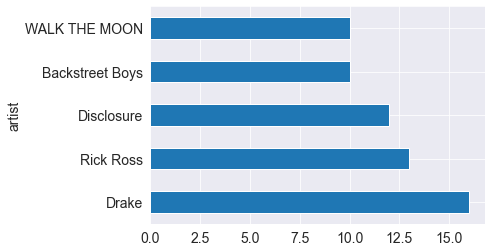

In [27]:
#sns.boxplot(top_5_artist)

top_5_artist.plot.barh()
plt.show()

#### Top 5 loudest tracks

In [15]:
top_5_loudess_tracks = df[['loudness', 'song_title', 'artist']].sort_values('loudness', ascending=False).head(5)
top_5_loudess_tracks

,loudness,song_title,artist
195,-0.307,GodLovesUgly,Atmosphere
636,-0.718,The Lion - Original Mix,The Partysquad
1443,-0.787,The Wall,Matrix & Futurebound
2010,-0.935,Hey Baby - Steve Aoki Remix,Dimitri Vegas & Like Mike
1299,-0.994,No Absolution,Thy Art Is Murder


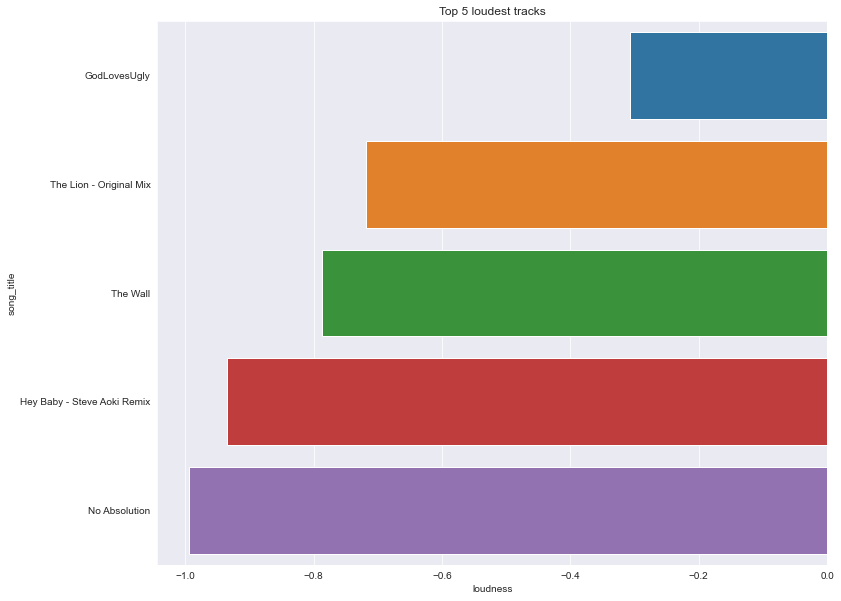

In [16]:
plt.figure(figsize=(12,10))
sns.barplot(x='loudness', y= 'song_title', data = top_5_loudess_tracks)
plt.title("Top 5 loudest tracks")
plt.show()

### Top 10 DAnce Songs with Artist Names

In [17]:
dance_song = df.sort_values('danceability', ascending=False)[['danceability', 'song_title','artist']].head(10)
dance_song

,danceability,song_title,artist
1433,0.984,Flashwind - Radio Edit,Ben Remember
1901,0.967,SexyBack,Justin Timberlake
604,0.962,Check Me Out Like,Blaqstarr
32,0.959,Best Friend,Young Thug
1957,0.959,Ice Ice Baby,Vanilla Ice
1136,0.950,Bad Liar,Selena Gomez
1977,0.947,Fuck Kd,StaRR Lyfe
138,0.944,Sippin On Some Syrup,Three 6 Mafia
623,0.941,I'm Different,2 Chainz
1591,0.941,Little Green Apple,Tumble Tots


Text(0.5, 1.0, 'Artist with Most Danceable Song')

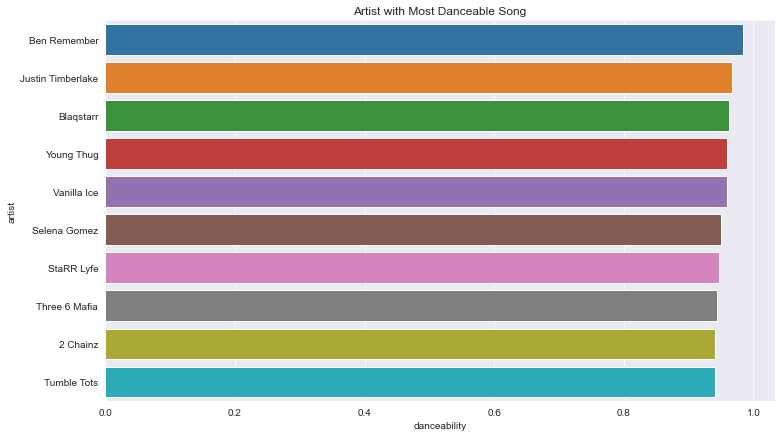

In [18]:
plt.figure(figsize=(12,7))
sns.barplot(x= dance_song.danceability,
           y = dance_song.artist)
plt.title("Artist with Most Danceable Song")

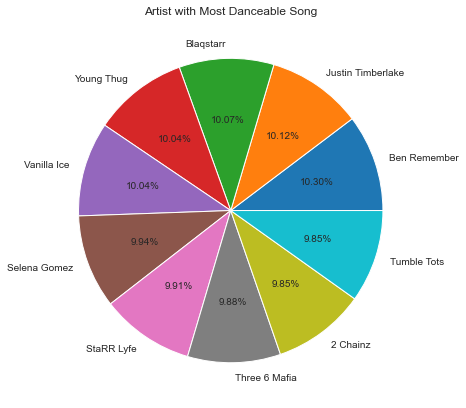

In [19]:
plt.figure(figsize=(12,7))
plt.pie(x= dance_song.danceability, autopct='%1.2f%%', labels=dance_song.artist)
plt.title("Artist with Most Danceable Song")
plt.show()

### Top 10 Instrumental tracks

In [20]:
top_10_instrumental = df.sort_values('instrumentalness', ascending=False)[['instrumentalness', 'song_title', 'artist']].head(10)
top_10_instrumental

,instrumentalness,song_title,artist
1313,0.976,Senseless Order,Signs of the Swarm
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
1575,0.964,A Hundred Dreams from Now,Ray Bryant
1619,0.958,Raven,John Dahlbäck
725,0.957,Strandbar (disko),Todd Terje
1546,0.956,Almas vaggvisa,Jan Lundgren Trio
1322,0.955,Pitchblack,Walking Dead On Broadway
1349,0.954,Prismatic Abyss,Aversions Crown
1661,0.954,Yebisah,Mark Knight
121,0.952,Chasing Heaven,Bassnectar


In [21]:
import matplotlib

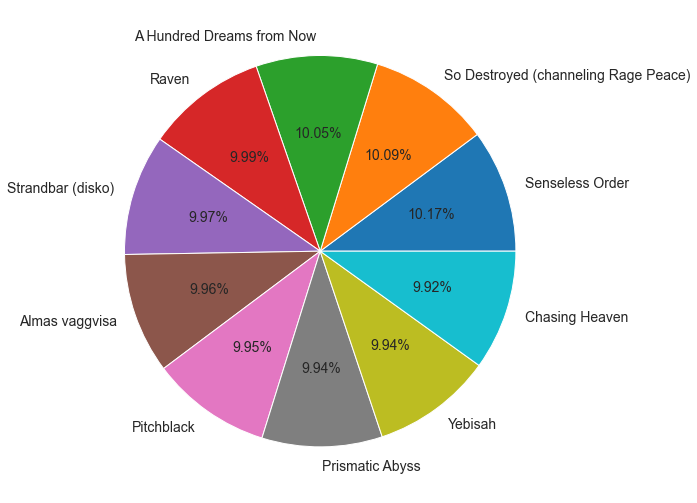

In [22]:
plt.figure(figsize=(15,9))
matplotlib.rcParams['font.size'] = 14
#plt.plot(top_10_instrumental.instrumentalness,top_10_instrumental.song_title)
plt.pie(top_10_instrumental.instrumentalness, autopct='%1.2f%%', labels=top_10_instrumental.song_title);
#plt.show()

###  Multiple feature plots

In [23]:
interest_feature_cols = ["tempo", "loudness", "acousticness", "danceability", "duration_ms", 
                         "energy", "instrumentalness", "liveness", "speechiness", "valence"]

In [24]:
df[df.target == 1]['loudness']

0       -8.795
1      -10.401
2       -7.148
3      -15.236
4      -11.648
         ...  
1015    -1.894
1016    -6.354
1017    -5.311
1018    -6.433
1019    -4.956
Name: loudness, Length: 1020, dtype: float64

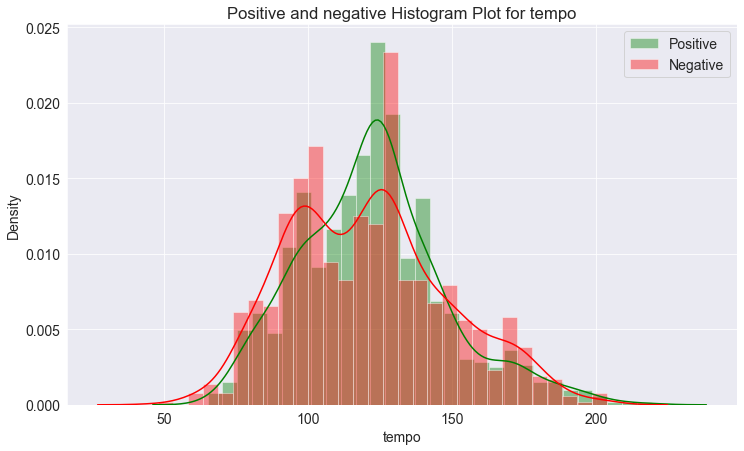

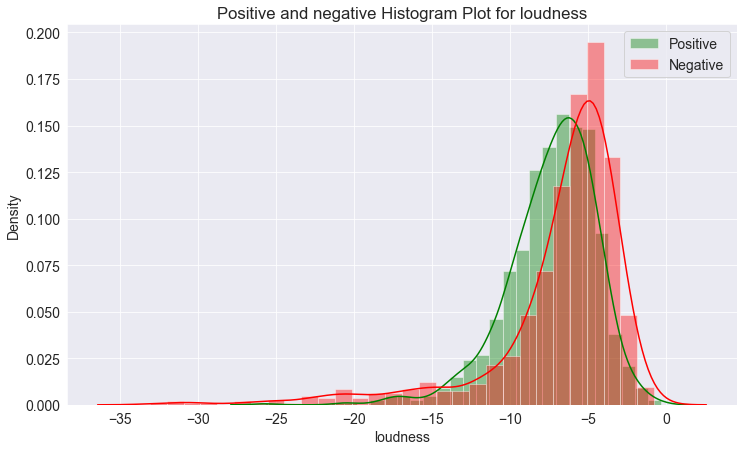

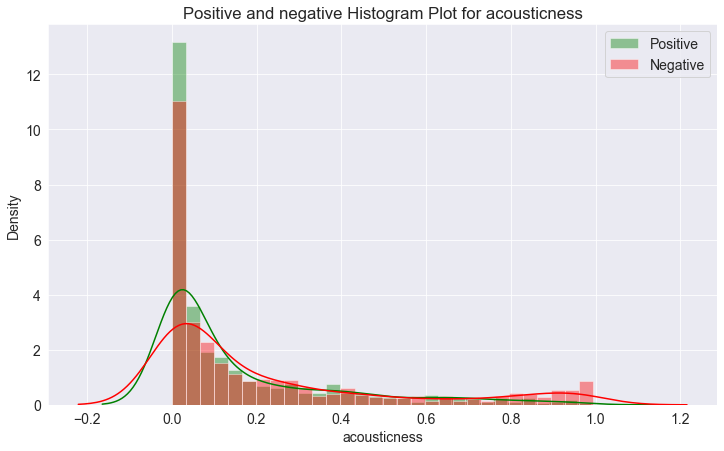

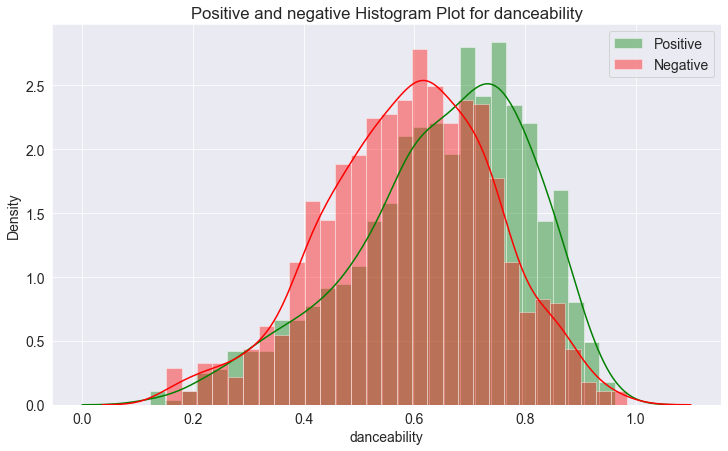

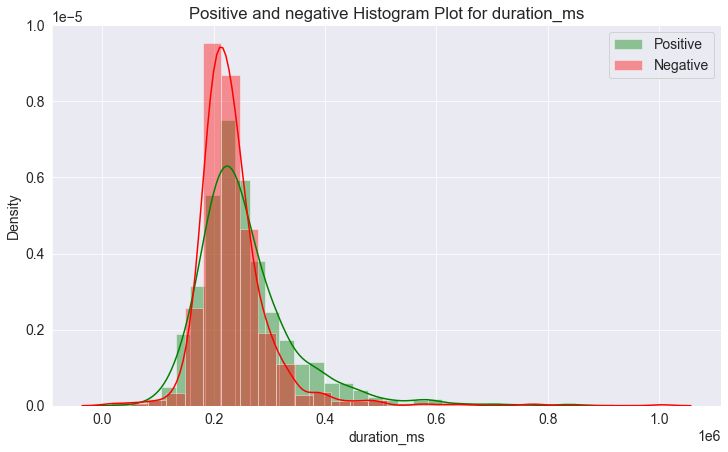

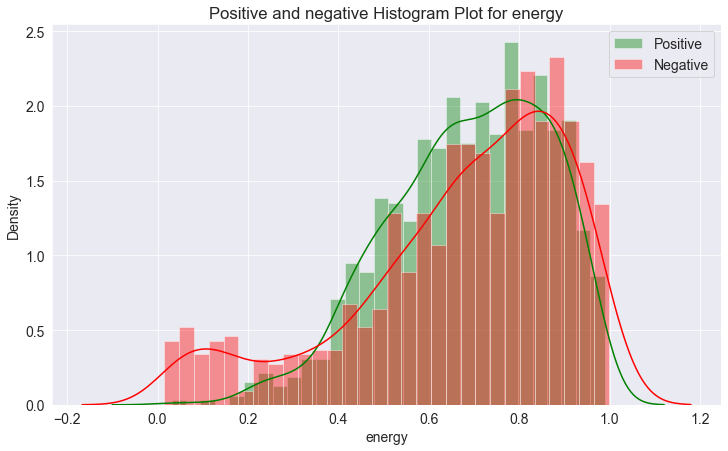

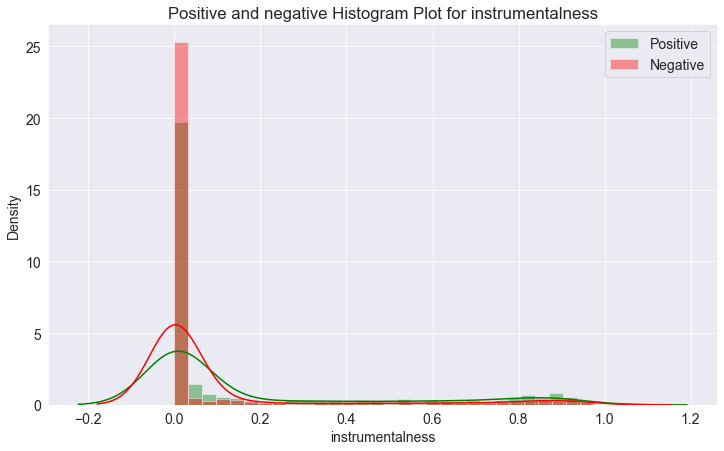

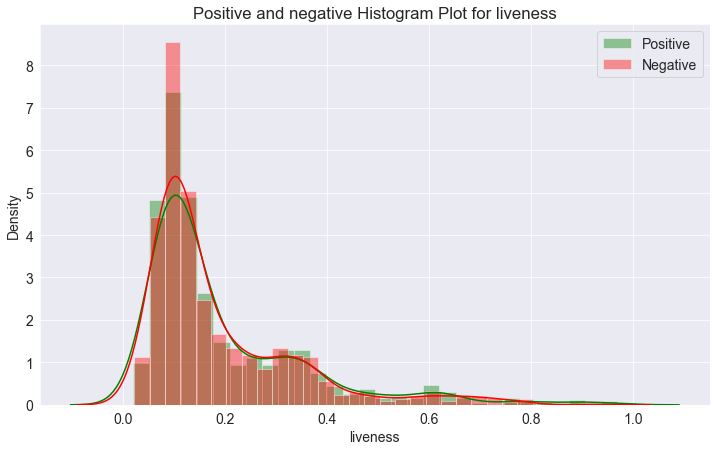

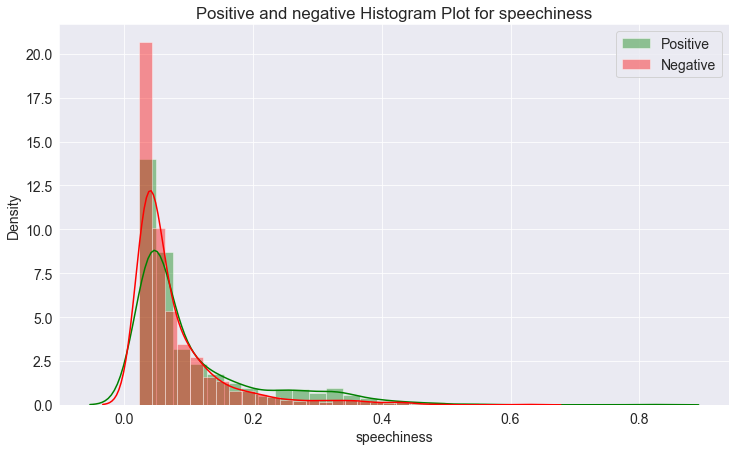

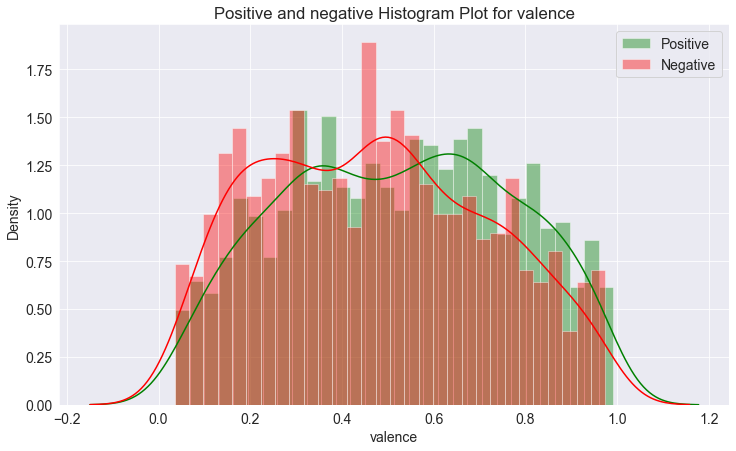

In [25]:
for feature_col in interest_feature_cols:
    pos_data = df[df["target"] == 1][feature_col]
    neg_data = df[df["target"] == 0][feature_col]
    
    plt.figure(figsize=(12,7))
    
    #sns.histplot(pos_data, bins=30, label="Positive", color="green")
    #sns.histplot(neg_data, bins=30, label="Negative", color="red")
    sns.distplot(pos_data, bins=30, label="Positive", color="green")
    sns.distplot(neg_data, bins=30, label="Negative", color="red")
    plt.legend(loc="upper right")
    plt.title(f"Positive and negative Histogram Plot for {feature_col}")
    plt.show()